## Predictive Analysis of Multivariable Data
This notebook presents an exploratory and predictive analysis of a dataset with ten input variables and one output variable.

In [1]:
import pandas as pd
data = pd.read_csv('preliminary_task.txt', sep='\t', header=None)

### Exploratory Data Analysis (EDA)
We start with a correlation analysis and visualize the data distributions.

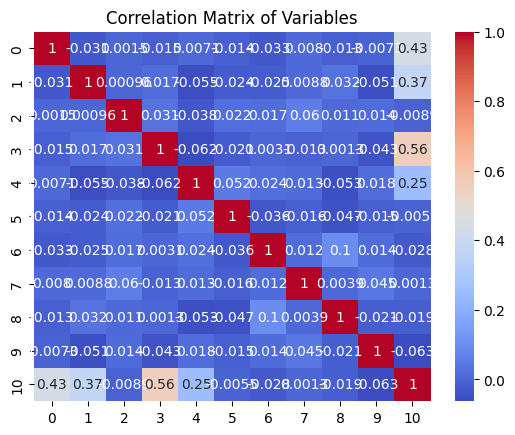

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

### Model Implementation and Evaluation
We implement Linear Regression and Random Forest models and evaluate them using RMSE.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Data Splitting
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
linear_predictions = linear_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# RMSE Calculation
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
linear_rmse, rf_rmse

(2.6609803076159038, 1.9799410765643168)

### Feature Importance Analysis
We analyze the importance of each feature in the Random Forest model.

In [5]:
feature_importance = rf_model.feature_importances_
feature_importance

array([0.24334647, 0.2115991 , 0.04402967, 0.34519441, 0.09585288,
       0.01184739, 0.01319061, 0.01069625, 0.01059216, 0.01365106])

### Conclusions and Recommendations
The Random Forest model shows a better performance with an RMSE of 1.98. Feature importance analysis highlights the most influential variables. Further improvements can be made through data preprocessing, hyperparameter tuning, and exploring advanced models.